# <center>New York City Taxi Fare Prediction

## Importing the necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgbm

import warnings
warnings.filterwarnings("ignore")

## Data Loading and EDA

In [2]:
# train = pd.read_csv('train.csv',nrows = 2000000)

In [3]:
# train.to_csv('train_filtered.csv',index = False)

In [4]:
train = pd.read_csv('train_filtered.csv')

In [5]:
train.shape

(2000000, 8)

In [6]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [7]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
dtype: int64

In [8]:
test = pd.read_csv('test.csv')

In [9]:
test.shape

(9914, 7)

In [10]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
train.dropna(axis=0,inplace = True)

In [12]:
train.shape

(1999986, 8)

In [13]:
train['fare_amount'].describe()

count    1.999986e+06
mean     1.134768e+01
std      9.852609e+00
min     -6.200000e+01
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

In [14]:
# as can be seen the fare_amount contains some negative values which shouldn't be the case

In [15]:
train[train['fare_amount'] < 0].index

Int64Index([   2039,    2486,   13032,   28839,   36722,   42337,   56748,
              58937,   97838,  102938,  165147,  179311,  182341,  288960,
             298412,  301356,  323637,  399785,  427602,  443469,  481419,
             512494,  519532,  534751,  549210,  577725,  605427,  698287,
             738404,  740842,  743726,  748552,  857263,  857721,  878023,
             888596,  896067,  963989, 1032448, 1042337, 1054606, 1071092,
            1083722, 1108362, 1118463, 1132401, 1164725, 1195270, 1196268,
            1197294, 1219472, 1237866, 1245992, 1261888, 1272414, 1321751,
            1355941, 1357181, 1381752, 1484989, 1507225, 1519941, 1554985,
            1577286, 1617051, 1622032, 1634444, 1650562, 1688692, 1693716,
            1703083, 1712467, 1714213, 1722272, 1878992, 1889603, 1974467],
           dtype='int64')

In [16]:
train.drop(train[train['fare_amount'] < 0].index , axis=0, inplace = True)

In [17]:
train.shape

(1999909, 8)

In [18]:
train['fare_amount'].describe()

count    1.999909e+06
mean     1.134841e+01
std      9.851787e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

In [19]:
# now the fare_amount column looks fine

In [20]:
train['passenger_count'].describe()

count    1.999909e+06
mean     1.684123e+00
std      1.314976e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [21]:
# passenger_count of 208 seems like an outlier as most of the count is either 0,1 or 2
#so let's drop the outlier

In [22]:
np.unique(train['passenger_count'])

array([  0,   1,   2,   3,   4,   5,   6,   9, 208], dtype=int64)

In [23]:
np.unique(test['passenger_count'])

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [24]:
train.drop(train[train['passenger_count'] == 208].index, axis = 0, inplace = True)
train.drop(train[train['passenger_count'] == 9].index, axis = 0, inplace = True)

In [25]:
np.unique(train['passenger_count'])

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [26]:
train['passenger_count'].describe()

count    1.999907e+06
mean     1.684016e+00
std      1.306849e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

In [27]:
train['pickup_latitude'].describe()

count    1.999907e+06
mean     3.992970e+01
std      7.983286e+00
min     -3.458665e+03
25%      4.073491e+01
50%      4.075263e+01
75%      4.076710e+01
max      2.621628e+03
Name: pickup_latitude, dtype: float64

In [28]:
# as the range of pickup latitude should be between -90 to 90, so something looks abnormal here

In [29]:
# have to remove the values that are outside the valid range

In [30]:
train[(train['pickup_latitude'] < -90) | (train['pickup_latitude'] > 90)] 

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.30,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
150559,2012-08-03 07:43:00.000000176,25.30,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
174356,2011-11-21 21:36:00.00000081,9.70,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.30,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
436233,2012-03-11 01:56:00.000000100,4.10,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
464025,2012-03-05 20:58:00.0000009,6.90,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.30,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012-03-16 08:13:00.000000272,8.50,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
543001,2011-10-28 13:53:00.000000178,5.30,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1
688685,2012-03-22 21:40:00.000000188,17.30,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1


In [31]:
train.drop(train[(train['pickup_latitude'] < -90) | (train['pickup_latitude'] > 90)].index, axis = 0, inplace = True)

In [32]:
train['pickup_latitude'].describe()

count    1.999874e+06
mean     3.992571e+01
std      6.084083e+00
min     -7.401727e+01
25%      4.073491e+01
50%      4.075263e+01
75%      4.076710e+01
max      7.400741e+01
Name: pickup_latitude, dtype: float64

In [33]:
train.shape

(1999874, 8)

In [34]:
# now let's check the pickup longitude values

In [35]:
train[(train['pickup_longitude'] < -180) | (train['pickup_longitude'] > 180)] 

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.90,2012-01-12 13:36:00 UTC,-736.550000,40.738230,-73.988742,40.748847,1
217355,2012-06-03 23:21:00.00000077,6.10,2012-06-03 23:21:00 UTC,-740.000000,40.747620,0.000000,0.000000,6
243342,2012-08-02 10:38:00.000000111,7.30,2012-08-02 10:38:00 UTC,-736.333333,40.766480,-73.987928,40.751742,3
351119,2012-02-03 07:53:00.000000135,4.10,2012-02-03 07:53:00 UTC,-736.483332,40.766512,-73.981992,40.771672,1
370663,2012-05-04 23:19:00.000000261,6.10,2012-05-04 23:19:00 UTC,-736.516667,40.719095,-74.003952,40.729860,1
416859,2012-07-21 15:23:00.00000093,6.50,2012-07-21 15:23:00 UTC,-736.416665,40.752285,-73.992565,40.742687,1
568830,2013-05-23 15:23:00.0000007,11.50,2013-05-23 15:23:00 UTC,-735.888333,40.760863,-73.989835,40.738443,5
675500,2011-10-28 10:53:00.00000080,16.90,2011-10-28 10:53:00 UTC,-1452.988333,40.776000,-73.989487,40.740667,2
837619,2012-07-17 08:38:00.000000116,39.70,2012-07-17 08:38:00 UTC,-736.000000,40.758507,0.000000,0.000000,5
914435,2012-03-04 00:10:00.000000131,11.70,2012-03-04 00:10:00 UTC,-736.250000,40.788027,-73.990812,40.750942,1


In [36]:
train.drop(train[(train['pickup_longitude'] < -180) | (train['pickup_longitude'] > 180)].index , axis = 0, inplace = True)

In [37]:
train.shape

(1999853, 8)

In [38]:
train['dropoff_latitude'].describe()

count    1.999853e+06
mean     3.992629e+01
std      7.616577e+00
min     -3.114339e+03
25%      4.073400e+01
50%      4.075312e+01
75%      4.076809e+01
max      3.210337e+03
Name: dropoff_latitude, dtype: float64

In [39]:
train['dropoff_longitude'].describe()

count    1.999853e+06
mean    -7.252233e+01
std      1.072059e+01
min     -2.125745e+03
25%     -7.399141e+01
50%     -7.398016e+01
75%     -7.396369e+01
max      4.558162e+01
Name: dropoff_longitude, dtype: float64

In [40]:
# even the dropoff_latitude and dropoff_longitude contains abnormal values
# so dropping the abnormal values

In [41]:
train.drop(train[(train['dropoff_latitude'] < -90) | (train['dropoff_latitude'] > 90)].index, axis = 0, inplace = True)
train.drop(train[(train['dropoff_longitude'] < -180) | (train['dropoff_longitude'] > 180)].index , axis = 0, inplace = True)

In [42]:
train.shape

(1999822, 8)

In [43]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [44]:
# key and pickup_datetime are datetime but init as objects, so converting them into datetime

In [45]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [46]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [47]:
# breaking the pickup_datetime into year,month,day,hour and day of week for further analysis

In [48]:
def get_year(data):
    return data.year

def get_month(data):
    return data.month

def get_day(data):
    return data.day

def get_hour(data):
    return data.hour

def get_dayofweek(data):
    return data.dayofweek

In [49]:
train['Year'] = train['pickup_datetime'].apply(get_year)
train['Month'] = train['pickup_datetime'].apply(get_month)
train['Day'] = train['pickup_datetime'].apply(get_day)
train['Hour'] = train['pickup_datetime'].apply(get_hour)
train['Day of Week'] = train['pickup_datetime'].apply(get_dayofweek)


test['Year'] = test['pickup_datetime'].apply(get_year)
test['Month'] = test['pickup_datetime'].apply(get_month)
test['Day'] = test['pickup_datetime'].apply(get_day)
test['Hour'] = test['pickup_datetime'].apply(get_hour)
test['Day of Week'] = test['pickup_datetime'].apply(get_dayofweek)

In [50]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1


In [51]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,1
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,1
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,5
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,5
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,5


In [52]:
# now let's create a seperate field called distance that will store the distance covered between pickup and the drop 

In [53]:
# we will calculate the distance using Haversine formula

In [54]:
def get_distance(pick_lat, pick_long, drop_lat, drop_long):
    R = 6371
    phi1 = np.radians(pick_lat)
    phi2 = np.radians(drop_lat)
    
    delta_phi = np.radians(pick_lat-drop_lat)
    delta_lambda = np.radians(pick_long-drop_long)
    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dist = (R * c)
    
    return dist

In [55]:
train['Distance'] = train.apply(lambda x: get_distance(x['pickup_latitude'], x['pickup_longitude'],
                                                      x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

test['Distance'] = test.apply(lambda x: get_distance(x['pickup_latitude'], x['pickup_longitude'],
                                                      x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

In [56]:
train['Distance']

0          1.030764
1          8.450134
2          1.389525
3          2.799270
4          1.999157
             ...   
1999995    0.412763
1999996    0.990211
1999997    3.298915
1999998    5.119378
1999999    5.705464
Name: Distance, Length: 1999822, dtype: float64

In [57]:
test['Distance']

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Name: Distance, Length: 9914, dtype: float64

In [58]:
train.shape

(1999822, 14)

In [59]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1,1.999157


In [60]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,1,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,1,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,5,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,5,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,5,5.387301


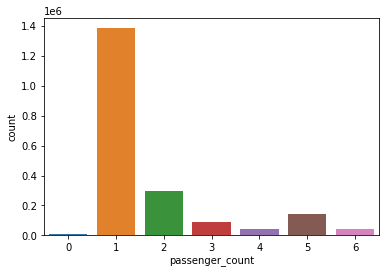

In [61]:
sns.countplot(data = train,x='passenger_count')
plt.show()

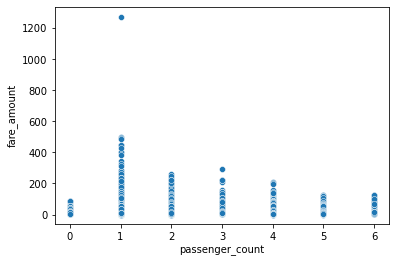

In [62]:
sns.scatterplot(data = train, x = 'passenger_count',y = 'fare_amount')
plt.show()

In [63]:
# there seems to be a corr between passenger_count and the fare_amount

In [64]:
# single passengers are the most frequent and the highest fare seems to be
# coming from taxis carrying only 1 passenger

In [65]:
# let's now check if the day and time of pickup affect the fare

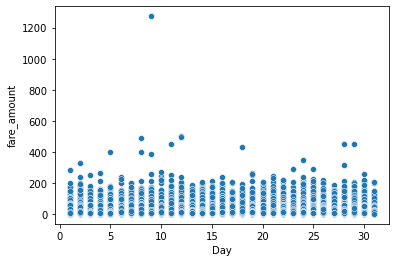

In [66]:
sns.scatterplot(data = train, x = 'Day',y = 'fare_amount')
plt.show()

In [67]:
# the fares seem to be uniform throughout the month

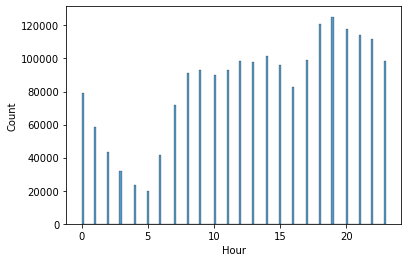

In [68]:
sns.histplot(data = train, x = 'Hour')
plt.show()

In [69]:
# looks like the time of the day plays a mojor role. The freq of rides is
#lowest at 5am and highest at 7pm.

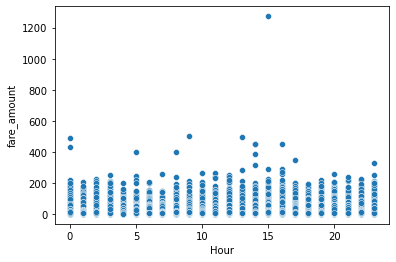

In [70]:
sns.scatterplot(data = train, x = 'Hour',y = 'fare_amount')
plt.show()

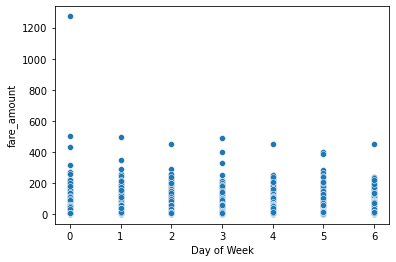

In [71]:
sns.scatterplot(data = train, x = 'Day of Week',y = 'fare_amount')
plt.show()

In [72]:
# The peak fare seem to be on sunday and monday and lowest on wednesday and friday

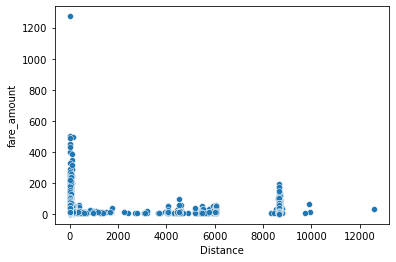

In [73]:
sns.scatterplot(data = train, x = 'Distance',y = 'fare_amount')
plt.show()

In [74]:
train.sort_values(['Distance','fare_amount'], ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance
793922,2012-06-03 11:19:37.000000200,32.1,2012-06-03 11:19:37+00:00,-73.863359,40.769278,45.581619,-2.013462,2,2012,6,3,11,6,12594.704725
646132,2012-02-08 20:24:00.000000173,10.5,2012-02-08 20:24:00+00:00,-89.439785,1.707957,0.000000,0.000000,1,2012,2,8,20,2,9945.278008
1806154,2012-06-14 16:09:00.000000400,63.3,2012-06-14 16:09:00+00:00,-88.959517,3.211167,0.000000,0.000000,5,2012,6,14,16,3,9892.028646
823943,2010-11-14 21:40:00.000000590,4.9,2010-11-14 21:40:00+00:00,0.000000,0.000000,-73.960303,81.510177,1,2010,11,14,21,6,9747.587427
1518056,2011-02-05 00:20:57.000000700,7.3,2011-02-05 00:20:57+00:00,0.000000,0.000000,-75.447466,40.773214,1,2011,2,5,0,5,8787.799520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39+00:00,-74.043442,40.788208,-74.043442,40.788208,1,2015,3,4,22,2,0.000000
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03+00:00,-73.994125,40.741131,-73.994125,40.741131,1,2015,5,27,23,2,0.000000
1221438,2015-02-02 21:58:28.000000300,0.0,2015-02-02 21:58:28+00:00,0.000000,0.000000,0.000000,0.000000,2,2015,2,2,21,0,0.000000
1598058,2013-08-06 11:12:00.000000480,0.0,2013-08-06 11:12:00+00:00,0.000000,0.000000,0.000000,0.000000,2,2013,8,6,11,1,0.000000


In [75]:
train['Distance'].describe()

count    1.999822e+06
mean     1.929844e+01
std      3.649560e+02
min      0.000000e+00
25%      1.212775e+00
50%      2.116134e+00
75%      3.879808e+00
max      1.259470e+04
Name: Distance, dtype: float64

In [76]:
# let's check how many people have travelled a distance of more than 200kms in NYC through cab

In [77]:
# these are the data with distance travelled greater than 200 and fare amount not equal to 0
huge_distance = train[(train['Distance'] > 200) & (train['fare_amount']!=0)]

In [78]:
len(huge_distance)

3970

In [79]:
# normalizing the abnormally high distances using the .apply method
# 2.5 is the base fare and 1.56 is the fare/km in NYC
huge_distance['Distance'] = huge_distance.apply(lambda x: (x['fare_amount'] - 2.50)/1.56, axis=1)

In [80]:
huge_distance['Distance'].describe()

count    3970.000000
mean        7.922392
std        10.873931
min        -0.641026
25%         1.923077
50%         4.102564
75%         8.333333
max       123.910256
Name: Distance, dtype: float64

In [81]:
# update the train dataframe with the newly computed distances
train.update(huge_distance)

In [82]:
train['Distance'].describe()

count    1.999822e+06
mean     3.344567e+00
std      1.980732e+01
min     -6.410256e-01
25%      1.211863e+00
50%      2.113796e+00
75%      3.867747e+00
max      8.667536e+03
Name: Distance, dtype: float64

In [83]:
#droping the rows with negative distances
train.drop(train[train['Distance'] < 0].index,axis=0,inplace = True)

In [84]:
train[train['Distance'] < 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance


In [85]:
#checking if there are any negative fares amounts
train[train['fare_amount'] < 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance


In [86]:
train.shape

(1999821, 14)

In [87]:
# rows with 0 fares
train[train['fare_amount'] == 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0,2010.0,2.0,15.0,14.0,0.0,3.184763
27891,2015-05-15 21:40:28.000000100,0.0,2015-05-15 21:40:28+00:00,-74.077927,40.805714,-74.077919,40.805721,1.0,2015.0,5.0,15.0,21.0,4.0,0.001064
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1.0,2010.0,3.0,18.0,19.0,3.0,0.018420
105051,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,2013.0,8.0,21.0,21.0,2.0,0.000000
175352,2014-06-29 16:04:29.000000200,0.0,2014-06-29 16:04:29+00:00,-73.484480,40.813401,-73.484442,40.813323,2.0,2014.0,6.0,29.0,16.0,6.0,0.009244
211455,2015-04-15 14:02:39.000000300,0.0,2015-04-15 14:02:39+00:00,-73.937378,40.758450,-73.937447,40.758450,1.0,2015.0,4.0,15.0,14.0,2.0,0.005783
211499,2010-03-08 18:22:00.000000760,0.0,2010-03-08 18:22:00+00:00,-73.937353,40.758227,-73.937358,40.758230,1.0,2010.0,3.0,8.0,18.0,0.0,0.000537
266485,2010-02-20 09:51:27.000000400,0.0,2010-02-20 09:51:27+00:00,-73.877376,40.772415,-73.877403,40.772391,1.0,2010.0,2.0,20.0,9.0,5.0,0.003506
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54+00:00,-73.982354,40.679971,-73.982354,40.679971,1.0,2013.0,8.0,5.0,6.0,0.0,0.000000
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38+00:00,-73.999496,40.748787,-74.002556,40.744659,1.0,2015.0,5.0,8.0,7.0,4.0,0.526370


In [88]:
# now let's check the rows with 0 distance values
train[train['Distance'] == 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,2012.0,12.0,24.0,11.0,0.0,0.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,2013.0,11.0,23.0,12.0,5.0,0.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,2011.0,2.0,7.0,20.0,0.0,0.0
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1.0,2009.0,3.0,25.0,0.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,2013.0,1.0,17.0,17.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999748,2012-07-30 23:55:00.000000730,5.7,2012-07-30 23:55:00+00:00,0.000000,0.000000,0.000000,0.000000,5.0,2012.0,7.0,30.0,23.0,0.0,0.0
1999850,2009-08-08 00:56:25.000000200,2.5,2009-08-08 00:56:25+00:00,-73.968732,40.754588,-73.968732,40.754588,1.0,2009.0,8.0,8.0,0.0,5.0,0.0
1999852,2012-09-05 11:58:00.000000171,7.0,2012-09-05 11:58:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,2012.0,9.0,5.0,11.0,2.0,0.0
1999868,2010-11-13 21:40:22.000000100,10.1,2010-11-13 21:40:22+00:00,0.000000,0.000000,0.000000,0.000000,3.0,2010.0,11.0,13.0,21.0,5.0,0.0


In [89]:
# so 28667 rows are having distance value as 0 in our dataset, so can't simply drop them we replace the 0 with something

In [90]:
# we can take care of the missing distance values with the fare and average price/km of NYC cabs

In [91]:
# The NYC cab fares are as follows
# $2.5 base-price + $1.56/km --> 6AM to 8PM Mon-Fri
# $3.0 base-price + $1.56/km --> 8PM to 6AM Mon-Fri and Sat&Sun

In [92]:
train[(train['Distance'] == 0)&(train['fare_amount'] == 0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance
105051,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,2013.0,8.0,21.0,21.0,2.0,0.0
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54+00:00,-73.982354,40.679971,-73.982354,40.679971,1.0,2013.0,8.0,5.0,6.0,0.0,0.0
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39+00:00,-74.043442,40.788208,-74.043442,40.788208,1.0,2015.0,3.0,4.0,22.0,2.0,0.0
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03+00:00,-73.994125,40.741131,-73.994125,40.741131,1.0,2015.0,5.0,27.0,23.0,2.0,0.0
1221438,2015-02-02 21:58:28.000000300,0.0,2015-02-02 21:58:28+00:00,0.000000,0.000000,0.000000,0.000000,2.0,2015.0,2.0,2.0,21.0,0.0,0.0
1598058,2013-08-06 11:12:00.000000480,0.0,2013-08-06 11:12:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,2013.0,8.0,6.0,11.0,1.0,0.0
1662545,2010-03-13 02:39:29.000000100,0.0,2010-03-13 02:39:29+00:00,-74.035278,40.738683,-74.035278,40.738683,2.0,2010.0,3.0,13.0,2.0,5.0,0.0


In [93]:
# these 4 rows have both fare_amount and distance as 0, so they don't help us in any way. Let's drop them

In [94]:
train.drop(train[(train['Distance'] == 0)&(train['fare_amount'] == 0)].index,axis=0,inplace = True)

In [95]:
# as the base amount for any cab service is $2.5

In [96]:
# so any row with distance as 0 and fare_amount < 2.5 is incorrect value

In [97]:
# between 6am-8pm on mon-fri base fare $2.5
train[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & 
            (train['Day of Week']<=5)) & (train['Distance']==0) & (train['fare_amount'] < 2.5))]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance
830616,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21+00:00,0.000000,0.000000,0.000000,0.000000,1.0,2015.0,1.0,21.0,6.0,2.0,0.0
925892,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,2015.0,1.0,21.0,14.0,2.0,0.0
1112195,2015-03-25 14:55:38.000000200,1.60,2015-03-25 14:55:38+00:00,0.000000,0.000000,0.000000,0.000000,2.0,2015.0,3.0,25.0,14.0,2.0,0.0
1215355,2015-05-29 18:15:27.000000600,2.00,2015-05-29 18:15:27+00:00,-73.903214,40.747318,-73.903214,40.747318,1.0,2015.0,5.0,29.0,18.0,4.0,0.0


In [98]:
train.drop(train[(((train['Hour'] >= 6) & (train['Hour'] <= 20)) & ((train['Day of Week'] >= 1) & 
            (train['Day of Week'] <=5 )) & (train['Distance'] == 0) & (train['fare_amount'] < 2.5))].index,axis=0,inplace = True)

In [99]:
# between 8pm-6am on mon-fri base fare $3.0
train[(((train['Hour']>20) | (train['Hour']<6)) & ((train['Day of Week']>=1) & 
            (train['Day of Week']<=5)) & (train['Distance']==0) & (train['fare_amount'] < 3.0))]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22+00:00,0.000000,0.000000,0.000000,0.000000,1.0,2014.0,5.0,29.0,5.0,3.0,0.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00+00:00,-73.998720,40.624708,-73.998720,40.624708,1.0,2010.0,1.0,19.0,1.0,1.0,0.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21+00:00,-73.986410,40.763350,-73.986410,40.763350,1.0,2009.0,8.0,25.0,1.0,1.0,0.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,2012.0,7.0,6.0,22.0,4.0,0.0
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08+00:00,0.000000,0.000000,0.000000,0.000000,1.0,2010.0,7.0,23.0,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996164,2012-12-21 01:17:00.000000118,2.5,2012-12-21 01:17:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,2012.0,12.0,21.0,1.0,4.0,0.0
1996690,2013-04-19 02:36:00.000000710,2.5,2013-04-19 02:36:00+00:00,-73.977523,40.749089,0.000000,0.000000,1.0,2013.0,4.0,19.0,2.0,4.0,0.0
1997329,2014-01-10 23:45:48.000000400,2.5,2014-01-10 23:45:48+00:00,-73.990203,40.761509,0.000000,0.000000,1.0,2014.0,1.0,10.0,23.0,4.0,0.0
1999538,2015-06-11 21:03:32.000000200,2.5,2015-06-11 21:03:32+00:00,0.000000,0.000000,-73.954582,40.784191,2.0,2015.0,6.0,11.0,21.0,3.0,0.0


In [100]:
train.drop(train[(((train['Hour']>20) | (train['Hour']<6)) & ((train['Day of Week']>=1) & 
            (train['Day of Week']<=5)) & (train['Distance']==0) & (train['fare_amount'] < 3.0))].index , axis = 0, inplace = True)

In [101]:
# Sat-Sun base fare $3.0

In [102]:
train[(((train['Day of Week'] == 0) | (train['Day of Week'] == 6)) & (train['Distance']==0) & (train['fare_amount'] < 3.0))]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2.0,2009.0,2.0,22.0,22.0,6.0,0.0
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23+00:00,-73.956556,40.779828,-73.956556,40.779828,1.0,2013.0,7.0,21.0,0.0,6.0,0.0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00+00:00,-73.950282,40.701282,-73.950282,40.701282,1.0,2012.0,8.0,27.0,15.0,0.0,0.0
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48+00:00,-73.948410,40.744969,-73.948410,40.744969,1.0,2014.0,1.0,13.0,16.0,0.0,0.0
4954,2010-01-10 13:44:35.000000700,2.5,2010-01-10 13:44:35+00:00,-73.983934,40.754938,-73.983934,40.754938,1.0,2010.0,1.0,10.0,13.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990265,2011-04-18 13:52:38.000000100,2.5,2011-04-18 13:52:38+00:00,-73.833744,40.766331,-73.833744,40.766331,1.0,2011.0,4.0,18.0,13.0,0.0,0.0
1991431,2009-11-09 23:50:34.000000500,2.5,2009-11-09 23:50:34+00:00,-73.982326,40.768821,-73.982326,40.768821,1.0,2009.0,11.0,9.0,23.0,0.0,0.0
1993050,2011-10-31 12:18:00.000000167,2.9,2011-10-31 12:18:00+00:00,-73.984157,40.771985,-73.984157,40.771985,1.0,2011.0,10.0,31.0,12.0,0.0,0.0
1997580,2009-10-04 13:20:52.000000100,2.5,2009-10-04 13:20:52+00:00,-73.985071,40.760973,-73.985071,40.760973,1.0,2009.0,10.0,4.0,13.0,6.0,0.0


In [103]:
train.drop(train[(((train['Day of Week'] == 0) | (train['Day of Week'] == 6)) & (train['Distance']==0) & (train['fare_amount'] < 3.0))].index , axis = 0, inplace = True)

In [104]:
train.shape

(1998503, 14)

In [105]:
# fare_amount = 0 but the distance !=0 , for these rows fare_amount needs to be imputed
case = train[(train['fare_amount'] == 0) & (train['Distance'] != 0)]

In [106]:
# using the formula fare = 2.5 + 1.56*Distance

In [107]:
case['fare_amount'] = case.apply(lambda x: ((x['Distance']*1.56) + 2.50), axis=1)

In [108]:
# taking care of outliers
case[case['fare_amount'] > 13515]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance
897211,2015-04-08 00:47:30.000000100,13515.750982,2015-04-08 00:47:30+00:00,0.000000,0.000000,-73.937698,40.758118,1.0,2015.0,4.0,8.0,0.0,2.0,8662.340373
930680,2015-03-21 21:27:02.000000200,13521.882720,2015-03-21 21:27:02+00:00,-73.982101,40.770557,0.000000,0.000000,2.0,2015.0,3.0,21.0,21.0,5.0,8666.270974
942215,2015-03-22 00:36:37.000000900,13517.350863,2015-03-22 00:36:37+00:00,-73.952240,40.749435,0.000000,0.000000,1.0,2015.0,3.0,22.0,0.0,6.0,8663.365938
949564,2015-04-28 11:18:39.000000400,13523.009797,2015-04-28 11:18:39+00:00,-73.996246,40.748653,0.000000,0.000000,1.0,2015.0,4.0,28.0,11.0,1.0,8666.993460
1201970,2015-06-20 02:57:04.000000200,13523.856498,2015-06-20 02:57:04+00:00,-74.004311,40.742542,0.000000,0.000000,1.0,2015.0,6.0,20.0,2.0,5.0,8667.536216
1380855,2015-03-25 01:14:37.000000100,13515.748120,2015-03-25 01:14:37+00:00,-73.937645,40.758244,0.000000,0.000000,1.0,2015.0,3.0,25.0,1.0,2.0,8662.338538
1634619,2013-08-06 23:11:41.000000400,13521.804407,2013-08-06 23:11:41+00:00,-73.993769,40.720913,0.000000,0.000000,1.0,2013.0,8.0,6.0,23.0,1.0,8666.220774
1729974,2015-06-08 05:19:21.000000200,13520.844512,2015-06-08 05:19:21+00:00,-73.984421,40.728683,0.000000,0.000000,1.0,2015.0,6.0,8.0,5.0,0.0,8665.605456
1833544,2015-05-01 01:49:29.000000300,13523.746869,2015-05-01 01:49:29+00:00,0.000000,0.000000,-74.001106,40.752079,1.0,2015.0,5.0,1.0,1.0,4.0,8667.465942


In [109]:
case.drop(case[case['fare_amount'] > 13515].index, axis=0,inplace = True)

In [110]:
case['fare_amount']

10002          7.468230
27891          2.501660
47302          2.528736
175352         2.514421
211455         2.509022
211499         2.500838
266485         2.505469
386734         3.321137
431819         7.179423
489767         2.501201
495273         2.500662
520715         3.157114
561786        19.524533
670254         2.500662
681342         2.501577
760662         3.034632
762802        25.597788
788466        28.034391
895361         3.369958
938020         2.501202
957590         2.505506
1104435       27.117942
1107618       40.420482
1155672        9.100196
1160560       29.457723
1161016        2.955397
1239525    13493.000198
1249746        3.162058
1290023        2.504680
1291130        2.937446
1296011        7.772359
1530388        2.672225
1614540       34.409197
1709610        2.501110
1788799       11.673407
1848497        2.964855
1865880        2.603418
1878626       20.351992
1902135       35.615572
1920170        3.049621
Name: fare_amount, dtype: float64

In [111]:
train.update(case)

In [112]:
train.shape

(1998503, 14)

In [113]:
# now let's take care of the rows where the fare is not 0 but the distance is 0

In [114]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Day                  0
Hour                 0
Day of Week          0
Distance             0
dtype: int64

In [115]:
case = train[(train['fare_amount'] > 3) & (train['Distance'] == 0)]

In [116]:
case['Distance'] = case.apply(lambda x: ((x['fare_amount']-2.50)/1.56), axis=1)

In [117]:
train.update(case)

In [118]:
train[train['Distance'] > 200]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day of Week,Distance
101885,2011-09-12 09:33:56.000000400,500.000000,2011-09-12 09:33:56+00:00,-73.965961,40.640595,-73.965961,40.640595,1.0,2011.0,9.0,12.0,9.0,0.0,318.910256
897211,2015-04-08 00:47:30.000000100,0.000000,2015-04-08 00:47:30+00:00,0.000000,0.000000,-73.937698,40.758118,1.0,2015.0,4.0,8.0,0.0,2.0,8662.340373
930680,2015-03-21 21:27:02.000000200,0.000000,2015-03-21 21:27:02+00:00,-73.982101,40.770557,0.000000,0.000000,2.0,2015.0,3.0,21.0,21.0,5.0,8666.270974
942215,2015-03-22 00:36:37.000000900,0.000000,2015-03-22 00:36:37+00:00,-73.952240,40.749435,0.000000,0.000000,1.0,2015.0,3.0,22.0,0.0,6.0,8663.365938
949564,2015-04-28 11:18:39.000000400,0.000000,2015-04-28 11:18:39+00:00,-73.996246,40.748653,0.000000,0.000000,1.0,2015.0,4.0,28.0,11.0,1.0,8666.993460
1144706,2015-03-09 15:12:00.000000200,1273.310000,2015-03-09 15:12:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,2015.0,3.0,9.0,15.0,0.0,814.621795
1201970,2015-06-20 02:57:04.000000200,0.000000,2015-06-20 02:57:04+00:00,-74.004311,40.742542,0.000000,0.000000,1.0,2015.0,6.0,20.0,2.0,5.0,8667.536216
1239525,2015-05-03 23:22:38.000000100,13493.000198,2015-05-03 23:22:38+00:00,-73.790138,40.643627,0.000000,0.000000,1.0,2015.0,5.0,3.0,23.0,6.0,8647.756537
1380855,2015-03-25 01:14:37.000000100,0.000000,2015-03-25 01:14:37+00:00,-73.937645,40.758244,0.000000,0.000000,1.0,2015.0,3.0,25.0,1.0,2.0,8662.338538
1634619,2013-08-06 23:11:41.000000400,0.000000,2013-08-06 23:11:41+00:00,-73.993769,40.720913,0.000000,0.000000,1.0,2013.0,8.0,6.0,23.0,1.0,8666.220774


In [119]:
train.drop(train[train['Distance'] > 200].index, axis = 0, inplace = True)

In [120]:
train.drop(train[train['pickup_latitude'] > 42].index, axis = 0, inplace = True)
train.drop(train[train['dropoff_latitude'] > 42].index, axis = 0, inplace = True)
train.drop(train[(train['dropoff_longitude'] > -72.5) | (train['dropoff_longitude'] < -75)].index, axis = 0, inplace = True)

In [121]:
# dropping the datetime columns as they cannot be used for modelling directly

In [122]:
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [123]:
train.drop(train[train['Distance'] > 100].index, axis = 0, inplace = True)

In [124]:
cols = train.select_dtypes(include=[np.float64]).columns
train[cols] = train[cols].astype(np.float32)

In [125]:
cols = test.select_dtypes(include=[np.int64]).columns
test[cols] = test[cols].astype(np.float32)

## Modelling 

In [126]:
X = train.drop('fare_amount',axis = 1)

In [127]:
y = train['fare_amount']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [129]:
# import time

# start_time = time.time()
# rfr = RandomForestRegressor(n_estimators = 3)
# rfr.fit(X_train, y_train)
# pred = rfr.predict(X_test)
# end_time = time.time()

# print("Time : {}".format(end_time-start_time))

In [130]:
import time
start_time = time.time()

model = GradientBoostingRegressor(n_estimators=20)
model.fit(X_train, y_train)
pred = model.predict(X_test)
end_time=time.time()
print("Time Taken: {} secs".format(round(end_time-start_time,3)))

Time Taken: 111.624 secs


In [131]:
np.sqrt(mean_squared_error(pred,y_test))

4.504893408683236

In [132]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators = 100 ,max_depth = 9)

model.fit(X_train, y_train)
pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

3.438987

In [133]:
pred = model.predict(test)
submission = pd.read_csv('sample_submission.csv')
submission['fare_amount'] = pred
submission.to_csv('submission_xgboost.csv', index=False)

In [134]:
def LGBM(param ,X_train, X_test, y_train, y_test):
    lgb_train = lgbm.Dataset(X_train, y_train, silent=True)
    lgb_test = lgbm.Dataset(X_test, y_test, silent=True)
    model = lgbm.train(params=param, train_set=lgb_train, valid_sets=lgb_test, verbose_eval=100)
    pred = model.predict(X_test, num_iteration=model.best_iteration)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    return model,rmse, pred

param = {
    'objective': 'regression', 'boosting': 'gbdt', 'reg_sqrt': True, 'learning_rate': 0.03, 'num_leaves': 1200,
    'max_depth': -1, 'max_bin': 500, 'num_rounds': 500, 'early_stopping_round': 10, 'metric': 'rmse', 'force_row_wise': True }
lgbm_model, lgbm_rmse, lgbm_pred = LGBM(param, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Total Bins 2591
[LightGBM] [Info] Number of data points in the train set: 1763524, number of used features: 11
Training until validation scores don't improve for 10 rounds
[100]	valid_0's rmse: 3.69962
[200]	valid_0's rmse: 3.5337
[300]	valid_0's rmse: 3.4889
[400]	valid_0's rmse: 3.47576
Early stopping, best iteration is:
[443]	valid_0's rmse: 3.47396


In [135]:
lgbm_rmse

3.473955595874216

In [136]:
pred = lgbm_model.predict(test)
submission = pd.read_csv('sample_submission.csv')
submission['fare_amount'] = pred
submission.to_csv('submission_lgbm_2M_500rounds.csv', index=False)

In [137]:
submission

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.330462
1,2015-01-27 13:08:24.0000003,10.561040
2,2011-10-08 11:53:44.0000002,4.355949
3,2012-12-01 21:12:12.0000002,9.520736
4,2012-12-01 21:12:12.0000003,16.650573
...,...,...
9909,2015-05-10 12:37:51.0000002,8.943278
9910,2015-01-12 17:05:51.0000001,10.996769
9911,2015-04-19 20:44:15.0000001,53.626610
9912,2015-01-31 01:05:19.0000005,18.999720
